In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# QUESTÃO 1
print("1) Carrega dataset e executa transformações")

# Carregar o dataset titanic_data
url = "https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv"
df = pd.read_csv(url)
print(f"\nDataset original: {df.shape}")
print(f"Primeiras 5 linhas:")
df.head()

1) Carrega dataset e executa transformações

Dataset original: (891, 12)
Primeiras 5 linhas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# Elimina as variáveis “PassengerId”, “Name”, “Ticket” e “Cabin”;
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
df_clean = df.drop(columns=columns_to_drop)
print(f"Dataset após a remoção de colunas 'PassengerId', 'Name', 'Ticket', 'Cabin': {df_clean.shape}")
print(f"Colunas restantes: {list(df_clean.columns)}\n")

Dataset após a remoção de colunas 'PassengerId', 'Name', 'Ticket', 'Cabin': (891, 8)
Colunas restantes: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']



In [33]:
# Elimina observações que contenham dados ausentes (NA)
print("Dados ausentes por coluna:")
print(df_clean.isnull().sum())
df_clean = df_clean.dropna()
print(f"\nDataset após a remoção de NAs: {df_clean.shape}\n")

Dados ausentes por coluna:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Dataset após a remoção de NAs: (712, 8)



In [34]:
# Aplica o LabelEncoder nas variáveis “Embarked” e “Sex”
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df_clean['Sex'] = le_sex.fit_transform(df_clean['Sex'])
df_clean['Embarked'] = le_embarked.fit_transform(df_clean['Embarked'])

print("Mapeamento LabelEncoder:")
print(f"Sex: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")
print(f"Embarked: {dict(zip(le_embarked.classes_, le_embarked.transform(le_embarked.classes_)))}")
print(f"\nDataset final transformado:")
df_clean.head()

Mapeamento LabelEncoder:
Sex: {'female': np.int64(0), 'male': np.int64(1)}
Embarked: {'C': np.int64(0), 'Q': np.int64(1), 'S': np.int64(2)}

Dataset final transformado:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [35]:
print(f"Dataset original (antes das transformações): {df.shape}")
print(f"Dataset atual (pós transformações): {df_clean.shape}")

Dataset original (antes das transformações): (891, 12)
Dataset atual (pós transformações): (712, 8)


In [36]:
# Separa o dataframe resultante em Treino-Teste, utilizando a proporção 75-25%
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"Conjunto de treino: {X_train.shape}")
print(f"Conjunto de teste: {X_test.shape}\n")

Conjunto de treino: (534, 7)
Conjunto de teste: (178, 7)



In [37]:
# Função auxiliar para avaliar os modelos gerados a seguir 
# Ela exibe métricas de avaliação como acurácia, recall, precision, F1-score,
# Além da matrix de confusão
def evaluate_model(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Métricas:")
    print(f"Acurácia:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    plt.figure(figsize=(6, 4))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Não Sobreviveu (0)', 'Sobreviveu (1)'],
                yticklabels=['Não Sobreviveu (0)', 'Sobreviveu (1)'],
                cbar_kws={'label': 'Número de Casos'})

    plt.title(f'Matriz de Confusão - {model_name}', fontsize=16, pad=20)
    plt.xlabel('Predição do Modelo', fontsize=12)
    plt.ylabel('Valores Reais', fontsize=12)

    plt.tight_layout()
    plt.show()
    
    return {
        'model': model_name,
        'confusion_matrix': cm,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

In [38]:
# Aplica um modelo SVM utilizando um Kernel Linear
print("Aplicando um modelo SVM utilizando um Kernel linear..")

c_values = [0.1, 1, 10, 100]
best_linear_score = 0
best_linear_c = 1

for c in c_values:
    svm = SVC(kernel='linear', C=c, class_weight='balanced', random_state=42)

    scores = cross_val_score(svm, X_train, y_train, cv=5)
    avg_score = scores.mean()
    
    if avg_score > best_linear_score:
        best_linear_score = avg_score
        best_linear_c = c

print(f"\nMelhor Linear: C={best_linear_c} (Acurácia: {best_linear_score:.4f})")

svm_linear = SVC(kernel='linear', C=best_linear_c, random_state=42, class_weight='balanced')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

Aplicando um modelo SVM utilizando um Kernel linear..

Melhor Linear: C=100 (Acurácia: 0.7753)


2) Apresenta a matriz de confusão e métricas resultante do processo de treinamento

Modelo SVM com Kernel Linear:
Métricas:
Acurácia:  0.7865
Precision: 0.7500
Recall:    0.7083
F1-Score:  0.7286


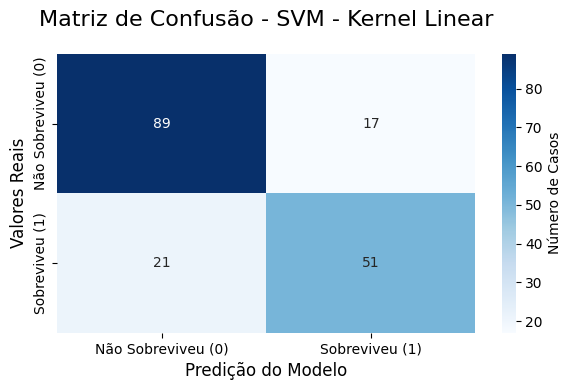

In [39]:
# QUESTÃO 2
print("2) Apresenta a matriz de confusão e métricas resultante do processo de treinamento")
print("\nModelo SVM com Kernel Linear:")
result_linear = evaluate_model(y_test, y_pred_linear, "SVM - Kernel Linear")
results.append(result_linear)

3) Executa o mesmo modelo, agora utilizando dois núcleos diferentes, o rbf e o sigmoid.

Modelo SVM com Kernel RBF:
Melhor RBF: C=100, gamma=scale (Acurácia: 0.7790)

Métricas:
Acurácia:  0.7416
Precision: 0.6585
Recall:    0.7500
F1-Score:  0.7013


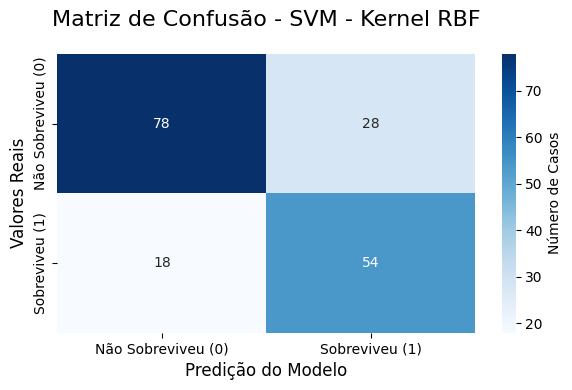

In [ ]:
# QUESTÃO 3
print("3) Executa o mesmo modelo, agora utilizando dois núcleos diferentes, o rbf e o sigmoid.")
print("\nModelo SVM com Kernel RBF:")

c_values = [1, 10, 100]
gamma_values = ['scale', 0.01, 0.1, 1]
best_rbf_score = 0
best_rbf_params = {'C': 1, 'gamma': 'scale'}

for c in c_values:
    for gamma in gamma_values:
        svm = SVC(kernel='rbf', C=c, gamma=gamma, class_weight='balanced', random_state=42)
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        avg_score = scores.mean()
        
        if avg_score > best_rbf_score:
            best_rbf_score = avg_score
            best_rbf_params = {'C': c, 'gamma': gamma}

print(f"Melhor RBF: C={best_rbf_params['C']}, gamma={best_rbf_params['gamma']} (Acurácia: {best_rbf_score:.4f})\n")

svm_rbf = SVC(kernel='rbf', random_state=42, class_weight='balanced', C=best_rbf_params['C'], gamma=best_rbf_params['gamma'])
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

result_rbf = evaluate_model(y_test, y_pred_rbf, "SVM - Kernel RBF")
results.append(result_rbf)

Modelo SVM com Kernel Sigmoid

Melhor Sigmoid: C=0.1, gamma=scale (Acurácia: 0.6909)

Métricas:
Acurácia:  0.6236
Precision: 0.5397
Recall:    0.4722
F1-Score:  0.5037


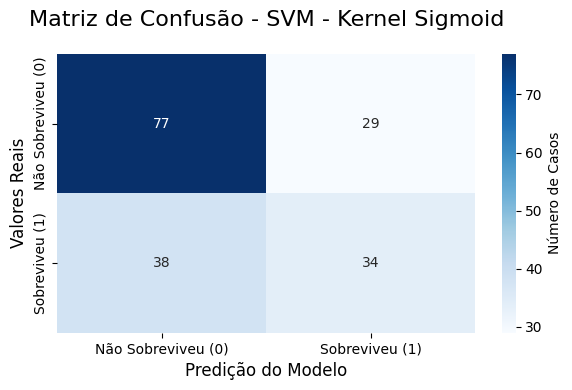

In [41]:
print("Modelo SVM com Kernel Sigmoid")
# Modelo SVM com Kernel Sigmoid

c_values = [0.1, 1, 10]
gamma_values = ['scale', 0.001, 0.01]
best_sigmoid_score = 0
best_sigmoid_params = {'C': 1, 'gamma': 'scale'}

for c in c_values:
    for gamma in gamma_values:
        svm = SVC(kernel='sigmoid', C=c, gamma=gamma, class_weight='balanced', random_state=42)
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        avg_score = scores.mean()
        
        if avg_score > best_sigmoid_score:
            best_sigmoid_score = avg_score
            best_sigmoid_params = {'C': c, 'gamma': gamma}

print(f"\nMelhor Sigmoid: C={best_sigmoid_params['C']}, gamma={best_sigmoid_params['gamma']} (Acurácia: {best_sigmoid_score:.4f})\n")

svm_sigmoid = SVC(kernel='sigmoid', C=best_sigmoid_params['C'], random_state=42, class_weight='balanced', gamma=best_sigmoid_params['gamma'])
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

result_sigmoid = evaluate_model(y_test, y_pred_sigmoid, "SVM - Kernel Sigmoid")
results.append(result_sigmoid)